In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

#### GPU 연산

In [2]:
# GPU를 사용가능하면 True, 아니면 False
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

print(device,"로 학습합니다.")

cpu 로 학습합니다.


In [3]:
random.seed(777)
torch.manual_seed(777)

# GPU 사용시
# if  device == 'cuda' :
#     torch.cuda.manual_seed_all(777)

epochs = 15
batch_size = 64

In [4]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)


In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [6]:
data_loader = DataLoader(dataset=mnist_train,
                        batch_size=batch_size,
                        shuffle=True,
                        drop_last=True)

#### drop_last = 마지막 배치를 버릴 것인지 결정

만약 1000개의 데이터가 있고 배치 사이즈를 64라고하면 

15개의 배치가 나오고 40개 가량의 데이터가 남습니다.

이떄 drop_last=True라고 하면 나머지 40개를 버립니다.

In [7]:
# image size 가 28 * 28 = 784, 0 ~ 9 까지 label 이므로 output= 10 
# 따라서 input dimention = 784, output dimention = 10
linear = nn.Linear(784, 10, bias=True).to(device)
loss = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [9]:
eopchs = 15 
for e in range(epochs + 1) :
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader :
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        pred = linear(X)
        cost = loss(pred, Y)
        
        cost.backward()
        optimizer.step()
        
        # loss 평균 값 계산
        avg_cost += cost / total_batch
        
    print('Epoch:', '%04d' % (e + 1), 'cost =', '{:.9f}'.format(avg_cost))


Epoch: 0001 cost = 0.477424920
Epoch: 0002 cost = 0.337148577
Epoch: 0003 cost = 0.314551920
Epoch: 0004 cost = 0.302499294
Epoch: 0005 cost = 0.294478625
Epoch: 0006 cost = 0.289055437
Epoch: 0007 cost = 0.284721881
Epoch: 0008 cost = 0.281204373
Epoch: 0009 cost = 0.278173178
Epoch: 0010 cost = 0.275808781
Epoch: 0011 cost = 0.273580611
Epoch: 0012 cost = 0.271644264
Epoch: 0013 cost = 0.270028591
Epoch: 0014 cost = 0.268456340
Epoch: 0015 cost = 0.267006099
Epoch: 0016 cost = 0.265966147


#### mnist_test data를 이용하여 model을 test 한다.

Label :  2
Prediction :  2


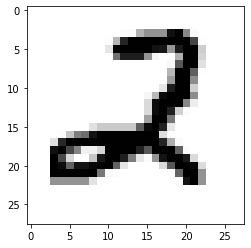

In [28]:
with torch.no_grad() :
    x_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()

    # 무작위로 1개를 test 해본다
    r = random.randint(0, len(mnist_test) - 1)
    x_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label : ', y_single_data.item())
    single_pred = linear(x_single_data)
    print('Prediction : ',torch.argmax(single_pred, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()